#Introduction to Dataset, DataLoader and Torchvision

In [1]:
#@markdown ---------------
#@markdown ## **⚠️❗ Ejecute esta celda para descargar Shoes dataset❗⚠️**
#@markdown ### Esta celda creará la carpeta ```/content/shoes_data```

!pip install -qq gdown
!gdown -qq "https://drive.google.com/uc?id=1_fIMm5nPp0BLJZKfkJZ_juRmLpRK4iA0" -O /shoes_data.zip
!mkdir /content/shoes_data/
!unzip -qq /shoes_data.zip -d /content/shoes_data
!rm -r /shoes_data.zip
print ("Done!")
#@markdown ---------------

Done!


In [ ]:
# !apt install neofetch
!neofetch

In [10]:
!ls /content/shoes_data/train/Boot | wc -l

4000


In [11]:
import torch
from torch import nn
from torchsummary import summary
from torchvision import datasets
from torchvision import transforms as T
from torch.utils.data import DataLoader

from PIL import Image
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [12]:
#---- Importar librerias. Incluya acá todas las librerías que requiera
train_dataset = datasets.ImageFolder(root= "/content/shoes_data/train" )
test_dataset = datasets.ImageFolder(root= "/content/shoes_data/test" )

In [32]:
print ( train_dataset[8500][0].size, train_dataset[8500][1] )
# plt.imshow( train_dataset[8500][0] )
print(type(train_dataset[8500][0]))

(136, 102) 2
<class 'PIL.Image.Image'>


In [33]:
def plot_images(imgs, grid_size = (5,5)):
    #
    _, axs = plt.subplots(grid_size[0], grid_size[1], figsize = (grid_size[0]*4, grid_size[1]*4))
    axs = axs.ravel()

    for i, (img, ax) in enumerate(zip(imgs, axs)):
      if isinstance(img, torch.Tensor) : #is tensor?
        img = img.detach().cpu().numpy()
      ax.imshow( img, cmap = 'gray' )
      ax.set_axis_off()

    plt.tight_layout()

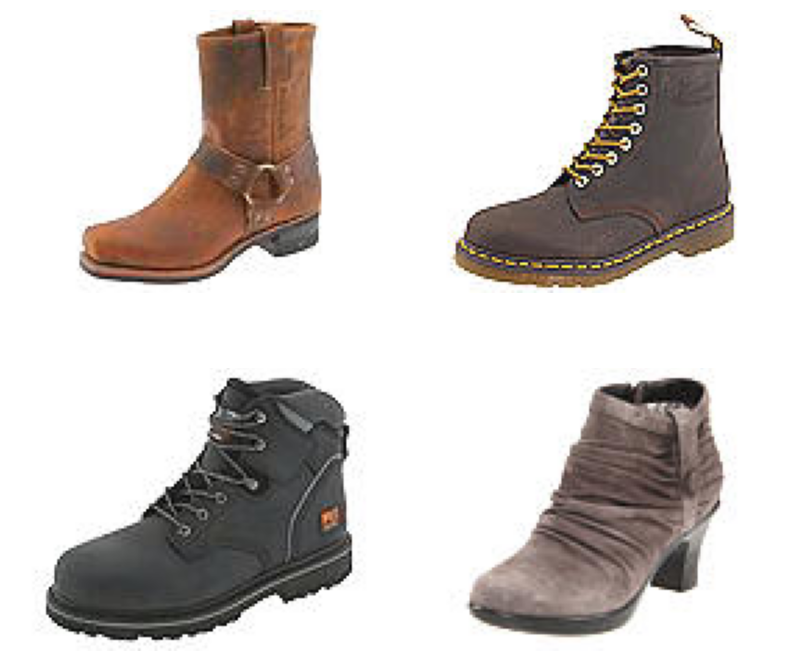

In [34]:
original_imgs = [ train_dataset[i][0] for i in range(4)]
# for i in range(4):
#   original_imgs.append(train_dataset[i][0])
plot_images (original_imgs, grid_size = (2,2))

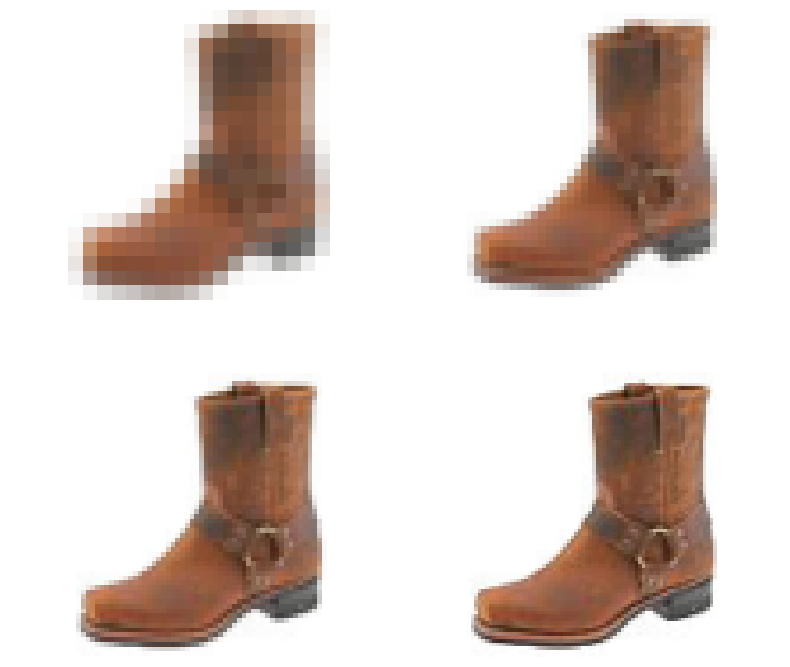

In [35]:
resized_imgs = [ T.Resize(size=size)( train_dataset[0][0] ) for size in (20,40,60,80)]
plot_images (resized_imgs, grid_size = (2,2))

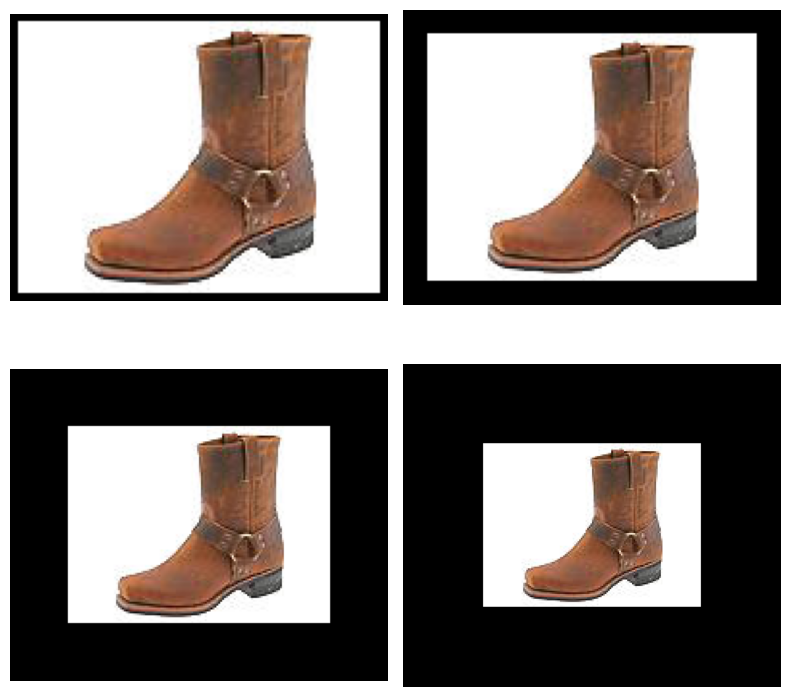

In [36]:
padded_imgs = [T.Pad(padding=padding)( train_dataset[0][0] ) for padding in (3, 10, 30, 50)]
plot_images (padded_imgs, grid_size = (2,2))

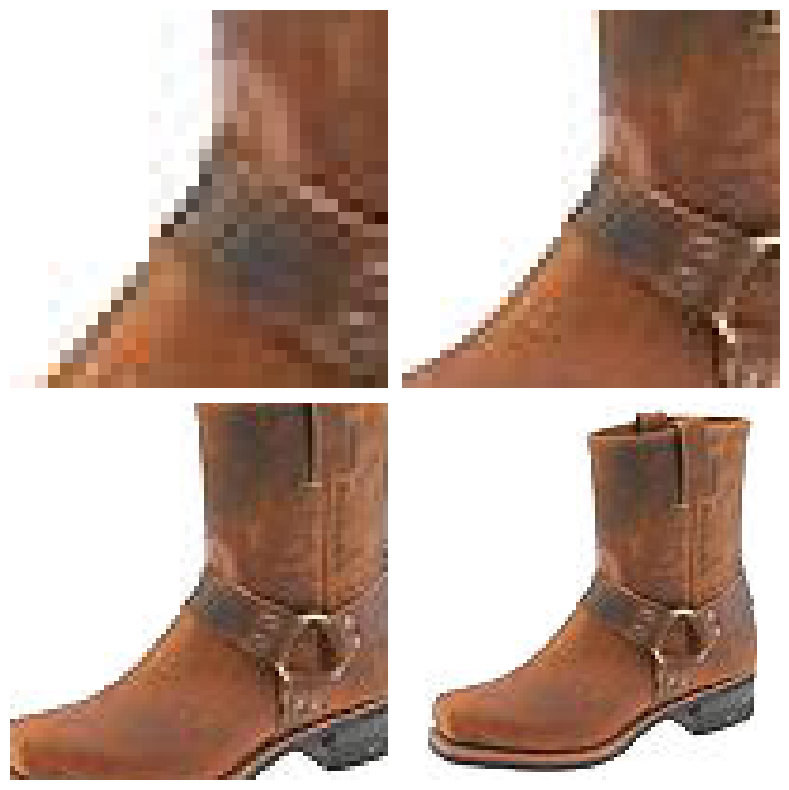

In [37]:
center_crops = [T.CenterCrop(size=size)( train_dataset[0][0] ) for size in (30, 50, 80, 100)]
plot_images (center_crops, grid_size = (2,2))

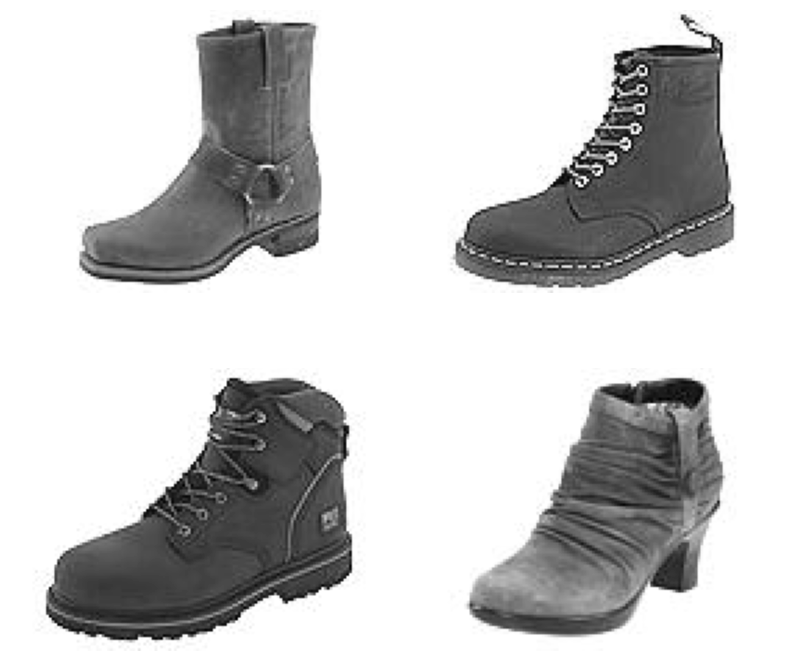

In [38]:
grayscale_imgs = [T.Grayscale()( train_dataset[i][0] ) for i in range(4)]
plot_images (grayscale_imgs, grid_size = (2,2))

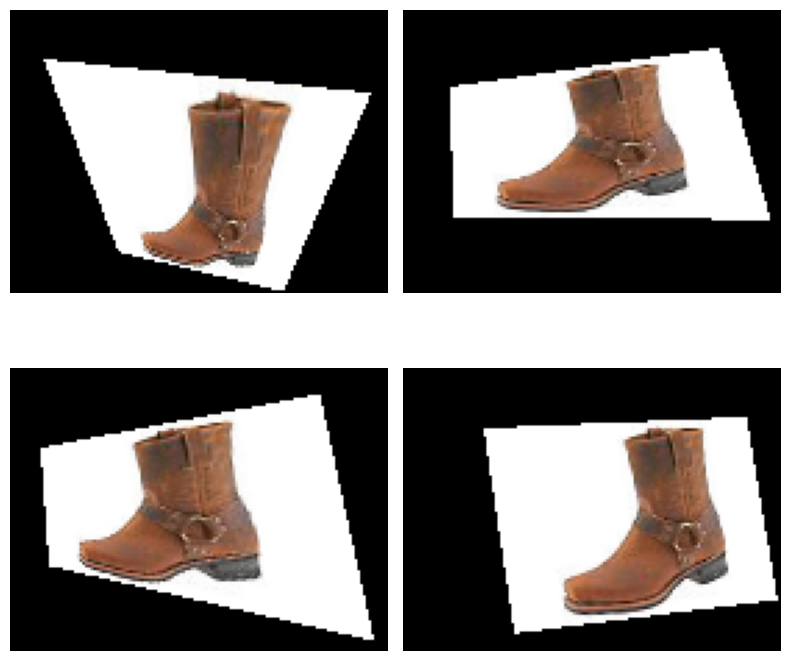

In [39]:
persp_imgs = [T.RandomPerspective(distortion_scale=0.6, p=1.0)( train_dataset[0][0] ) for i in range(4)]
plot_images (persp_imgs, grid_size = (2,2))

## Create a dataloader

In [55]:
image_transforms = T.Compose([T.Resize((64,64), Image.BICUBIC),
                              T.Grayscale(),
                              T.RandomPerspective(distortion_scale=0.6, p=1.0),
                              T.ToTensor()])

In [56]:
#---- Importar librerias. Incluya acá todas las librerías que requiera
train_dataset = datasets.ImageFolder(root= "/content/shoes_data/train" , transform = image_transforms )
test_dataset = datasets.ImageFolder(root= "/content/shoes_data/test" , transform = image_transforms )

train_loader = DataLoader(train_dataset, batch_size= 50 , shuffle=True)
test_loader = DataLoader(test_dataset, batch_size= 50 )

In [57]:
print (train_loader)

In [59]:
trainBatch = next(iter(train_loader))
valBatch = next(iter(test_loader))

In [60]:
print (trainBatch[0].shape, trainBatch[1].shape)

torch.Size([50, 1, 64, 64]) torch.Size([50])


In [61]:
for i, (batch_X, batch_y) in enumerate(train_loader):
  #
  print (batch_X.shape, batch_y.shape)

torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size([50, 1, 64, 64]) torch.Size([50])
torch.Size